In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Copying data from google drive folder to local drive folder
%cp '/content/drive/MyDrive/CW_Dataset.zip' '/content/'
%cd '/content'
!unzip 'CW_Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: CW_Dataset/train/train_07272_aligned.jpg  
  inflating: CW_Dataset/train/train_07273_aligned.jpg  
  inflating: CW_Dataset/train/train_07274_aligned.jpg  
  inflating: CW_Dataset/train/train_07275_aligned.jpg  
  inflating: CW_Dataset/train/train_07276_aligned.jpg  
  inflating: CW_Dataset/train/train_07277_aligned.jpg  
  inflating: CW_Dataset/train/train_07278_aligned.jpg  
  inflating: CW_Dataset/train/train_07279_aligned.jpg  
  inflating: CW_Dataset/train/train_07280_aligned.jpg  
  inflating: CW_Dataset/train/train_07281_aligned.jpg  
  inflating: CW_Dataset/train/train_07282_aligned.jpg  
  inflating: CW_Dataset/train/train_07283_aligned.jpg  
  inflating: CW_Dataset/train/train_07284_aligned.jpg  
  inflating: CW_Dataset/train/train_07285_aligned.jpg  
  inflating: CW_Dataset/train/train_07286_aligned.jpg  
  inflating: CW_Dataset/train/train_07287_aligned.jpg  
  inflating: CW_Dataset/train/train_07288_aligned.jpg

In [ ]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt

#Hog feature extractor
#This function extracts Histogram of Oriented Gradients (HOG) features from an input image.
#The hog function comes from the scikit-image library that compute the HOG features.

#defining feature extractor that we want to use
def hog_data_extractor(jpeg_path):
    image = cv2.imread(jpeg_path)
    HOG_des, HOG_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
    hog_data = HOG_des#/255.0
    return hog_data

In [ ]:
#Read images from the training and test directories, extracts HOG features using the hog_data_extractor function,
#Assign labels to each image based on the label files. Converting the extracted features and labels into NumPy arrays.

import numpy as np
import cv2
import pandas as  pd
import os

#Reading images into a single array
train_path = 'CW_Dataset/train/'
test_path = 'CW_Dataset/test/'
train_labels = 'CW_Dataset/labels/list_label_train.txt'
test_labels = 'CW_Dataset/labels/list_label_test.txt'

Xtrain,ytrain = [],[]
Xtest,ytest = [],[]

train_labels = pd.read_csv(train_labels,sep=' ',header=None)
train_labels = train_labels.set_index(0)
train_labels.columns = ['label']

test_labels = pd.read_csv(test_labels,sep=' ',header=None)
test_labels = test_labels.set_index(0)
test_labels.columns = ['label']

print("Reading Training images...")
for img in os.listdir(train_path):
  img_path = os.path.join(train_path,img)
  if img_path.endswith('.jpg'):
    Xtrain.append(hog_data_extractor(img_path))
    p = img.split('_aligned')[0]+'.jpg'
    ytrain.append(train_labels.loc[p].values[0])

print("Reading Test images...")
for img in os.listdir(test_path):
  img_path = os.path.join(test_path,img)
  if img_path.endswith('.jpg'):
    Xtest.append(hog_data_extractor(img_path))
    p = img.split('_aligned')[0]+'.jpg'
    ytest.append(test_labels.loc[p].values[0])

Xtrain,Xtest = np.array(Xtrain),np.array(Xtest)
ytrain,ytest = np.array(ytrain),np.array(ytest)

print("Done!")

Reading Training images...
Reading Test images...
Done!


In [ ]:
print((Xtrain.shape))
print((ytrain.shape))
print((Xtest.shape))
print((ytest.shape))

(12271, 288)
(12271,)
(3068, 288)
(3068,)


In [ ]:
import time
from sklearn.svm import SVC
start_time = time.time() #Measure Time

#Create SVM model with an RBF Kernel and Train the model on the training dataset
model = SVC(kernel = 'rbf')
model.fit(Xtrain,ytrain)
print("--- %s seconds for SVM(rbf)---" % (time.time() - start_time))
print('Accuracy',model.score(Xtest,ytest))

--- 35.87929129600525 seconds for SVM(rbf)---
Accuracy 0.6427640156453716


In [ ]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time() #Measure Time

#Create Random Forest model and Train the model on the training dataset
model = RandomForestClassifier()
model.fit(Xtrain,ytrain)
print("--- %s seconds for RandomForest---" % (time.time() - start_time))
print('Accuracy',model.score(Xtest,ytest))

--- 25.07746434211731 seconds for RandomForest---
Accuracy 0.5518252933507171


In [ ]:
import time
start_time = time.time() #Measure Time

#Create SVM(Linear) Model and Train the model on the training dataset
model = SVC()
model.fit(Xtrain,ytrain)
print("--- %s seconds for SVM(linear)---" % (time.time() - start_time))
print('Accuracy',model.score(Xtest,ytest))

--- 35.30151915550232 seconds for SVM(linear)---
Accuracy 0.6427640156453716


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
start_time = time.time() #Measure Time

#Use the trained SVM model to predict the labels on the xtest dataset
s_pred = model.predict(Xtest)
print("--- %s seconds ---" % (time.time() - start_time))
print(confusion_matrix(ytest,s_pred))
print(classification_report(ytest,s_pred))
print(accuracy_score(ytest, s_pred))

--- 15.87619423866272 seconds ---
[[ 170    0    0   54   16    5   84]
 [  17   12    0   23    7    4   11]
 [   9    0    8   46   30    5   62]
 [  27    0    0 1033   43    7   75]
 [  21    0    3  112  220    6  116]
 [  10    0    3   63   14   51   21]
 [  37    0    2  103   59    1  478]]
              precision    recall  f1-score   support

           1       0.58      0.52      0.55       329
           2       1.00      0.16      0.28        74
           3       0.50      0.05      0.09       160
           4       0.72      0.87      0.79      1185
           5       0.57      0.46      0.51       478
           6       0.65      0.31      0.42       162
           7       0.56      0.70      0.63       680

    accuracy                           0.64      3068
   macro avg       0.65      0.44      0.47      3068
weighted avg       0.64      0.64      0.62      3068

0.6427640156453716


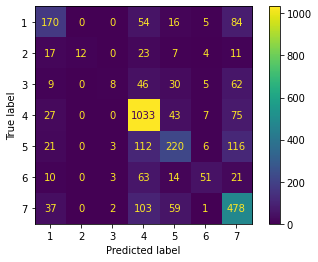

In [ ]:
#Confusion Matrix
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_predictions(ytest, s_pred)
plt.show()

In [ ]:
#Saving the model
import pickle
filename = 'svm_with_hog.sav'
pickle.dump(model, open(filename, 'wb'))

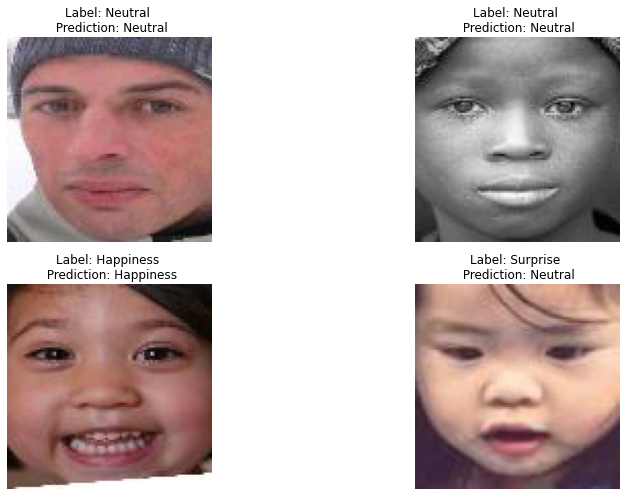

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import keras
import numpy as np

#Load the saved SVM model
filename = 'svm_with_hog.sav'
model = pickle.load(open(filename, 'rb'))

path_to_testset = 'CW_Dataset/test/'
labels_path = 'CW_Dataset/labels/list_label_test.txt'
labels = pd.read_csv(labels_path,sep=' ',header=None)
labels = labels.set_index(0)
labels.columns = ['label']

fig, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()
for n in range(4):
    i = random.randint(1, len(labels) - 1)
    if i < 10:
        path = path_to_testset + 'test_000' + str(i + 1) + '.jpg'
    elif i < 100:
        path = path_to_testset + 'test_00' + str(i + 1) + '.jpg'
    elif i < 1000:
        path = path_to_testset + 'test_0' + str(i + 1) + '.jpg'
    elif i < 10000:
        path = path_to_testset + 'test_' + str(i + 1) + '.jpg'
    p = path.split('.')[0]+'_aligned.jpg'
    path = path.split('/')[-1]
    label = labels.loc[path].values[0]
    img = io.imread(p) #Load the image
    ax[n].imshow(img)
    emo_dict = {1: 'Surprise', 2: 'Fear', 3: 'Disgust', 4: 'Happiness', 5: 'Sadness', 6: 'Anger', 7: 'Neutral'}
    label = emo_dict[label]
    img,_ = hog(img, orientations=8, pixels_per_cell=(16, 16),
                             cells_per_block=(1, 1), visualize=True, multichannel=True)
    img = np.expand_dims(img,axis=0)
    out = model.predict(img)
    out = emo_dict[out[0]]
    ax[n].set_title(f'Label: {label} \n Prediction: {out}')
    ax[n].set_axis_off()
fig.tight_layout()
plt.show()